In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('HW_6_data.csv')

In [3]:
df.head()

,dates,SKU,price_per_sku
0,2019-03-11,11617,182.0
1,2019-03-12,11617,182.0
2,2019-03-13,11617,182.0
3,2019-03-15,11617,182.0
4,2019-03-17,11617,182.0


In [4]:
sku_num = len(set(df['SKU'].tolist()))

sku_num

10

In [5]:
dates = pd.to_datetime(df['dates'])
df.loc[:, ('dates')] = dates

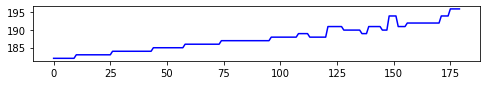

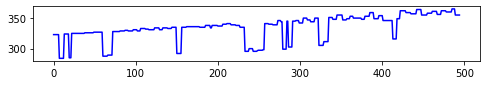

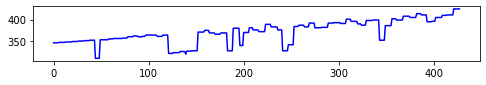

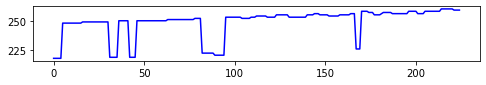

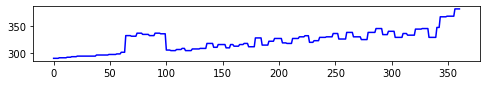

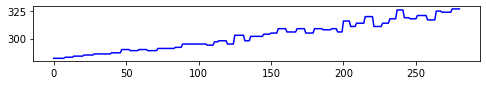

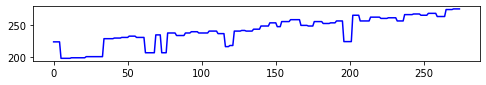

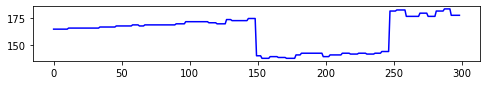

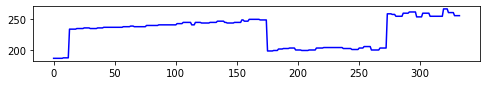

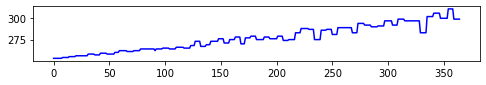

In [6]:
sku_list = list(set(df['SKU'].tolist()))

for s in sku_list:
    plt.figure(figsize=(8, 1))
    data = df[df['SKU'] == s]
    data = data.sort_values('dates')
#     plt.plot(data['dates'], data['price_per_sku'], color='b')
    plt.plot(list(range(len(data['price_per_sku']))), data['price_per_sku'], color='b')
    plt.show()

### 1

In [7]:
# pip install tslearn --trusted-host pypi.org --trusted-host pypi.python.org

In [8]:
from tslearn.clustering import TimeSeriesKMeans
from tslearn.utils import to_time_series_dataset

/Users/19587293/.local/lib/python3.8/site-packages/tslearn/clustering/kmeans.py:16: UserWarning: Scikit-learn <0.24 will be deprecated in a future release of tslearn
  warnings.warn(


In [9]:
data_list = []
for s in sku_list:
    data = df[df['SKU'] == s]
    data = data.sort_values('dates')
    data = (data['price_per_sku']/data['price_per_sku'].mean()).tolist()
    data_list.append(data)

In [10]:
data = to_time_series_dataset(data_list)

In [11]:
model = TimeSeriesKMeans(n_clusters=3, metric="dtw", max_iter=100)
predicts = model.fit_predict(data)

In [12]:
k = 3
ans = []
for i in range(k):
    cluster = str(np.array(sku_list)[predicts == i].tolist())[1:-1]
    ans.append(cluster)

In [13]:
with open(r'part1.txt', 'w') as fp:
    for item in ans:
        fp.write("%s\n" % item)

In [14]:
k = 3
ans = []
for i in range(k):
    cluster = np.array(sku_list)[predicts == i].tolist()
    ans.append(cluster)

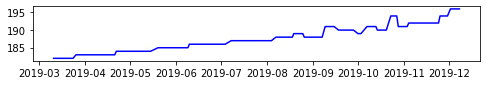

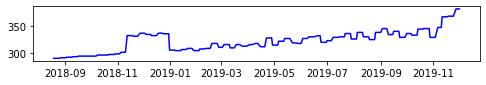

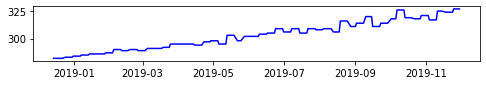

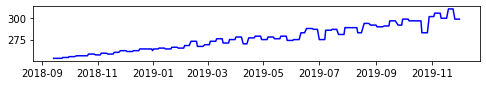

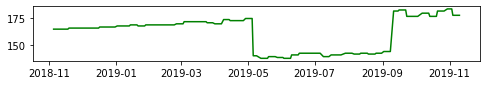

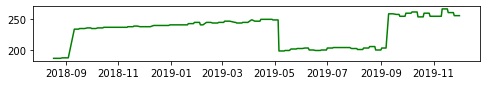

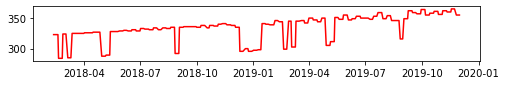

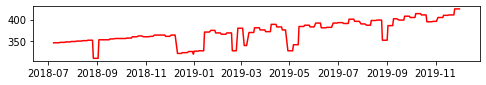

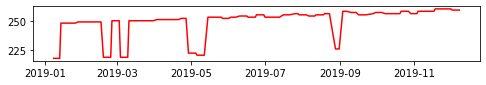

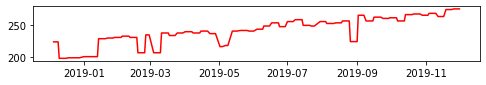

In [15]:
c = ['b', 'g' ,'r']
for i in range(k):
    for s in ans[i]:
        plt.figure(figsize=(8, 1))
        data = df[df['SKU'] == s]
        data = data.sort_values('dates')
        plt.plot(data['dates'], data['price_per_sku'], color=c[i])
#         plt.plot(list(range(len(data['price_per_sku']))), data['price_per_sku'], color=c[i])
        plt.show()